In [487]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [488]:
data = pd.read_csv("C:\\Users\\samni\\OneDrive\\Desktop\\movies\\movies.csv")

In [489]:
data.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [490]:
data.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [491]:
data.shape

(77, 8)

In [492]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
Film                 77 non-null object
Genre                77 non-null object
Lead Studio          77 non-null object
Audience score %     77 non-null int64
Profitability        77 non-null float64
Rotten Tomatoes %    77 non-null int64
Worldwide Gross      77 non-null object
Year                 77 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [493]:
data.columns = data.columns.str.replace(' ', '')

In [494]:
for i, row in data.iterrows(): #Iterate through each row of dataframe
    gross = data.WorldwideGross[i]
    gross = gross.replace('$','') #Trims $ from the values
    #gross = gross.replace('%','') #Trims , from the values.
    data.WorldwideGross[i] = gross

C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [495]:
#data.Genre = str(data.Genre).replace('darama', 'drama')

In [496]:
data = data.rename(columns = {data.columns[-3] : 'RottenTomatoes'})

In [497]:
data = data.rename(columns = {data.columns[-5] : 'Audiencescore'})

In [498]:
data.head()

,Film,Genre,LeadStudio,Audiencescore,Profitability,RottenTomatoes,WorldwideGross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,219.37,2008


In [499]:
data['WorldwideGross'] = pd.to_numeric(data['WorldwideGross'], errors='coerce')

In [500]:
print(data['Genre'].value_counts(dropna=False))

Comedy       41
Drama        13
Romance      13
Animation     4
Action        1
romance       1
comedy        1
Romence       1
Fantasy       1
Comdy         1
Name: Genre, dtype: int64


In [501]:
print(data['LeadStudio'].value_counts(dropna=False))

Independent              19
Warner Bros.             14
Universal                 8
Disney                    8
Fox                       6
Summit                    5
Paramount                 4
Sony                      4
The Weinstein Company     3
Lionsgate                 2
20th Century Fox          2
New Line                  1
CBS                       1
Name: LeadStudio, dtype: int64


In [502]:
data.describe()

,Audiencescore,Profitability,RottenTomatoes,WorldwideGross,Year
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,145.217532,2009.077922
std,13.657113,8.031990,26.095001,164.040155,1.354974
min,35.000000,0.000000,3.000000,0.030000,2007.000000
25%,52.000000,1.751351,26.000000,32.590000,2008.000000
50%,64.000000,2.642353,45.000000,79.180000,2009.000000
75%,76.000000,5.103117,64.000000,205.300000,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


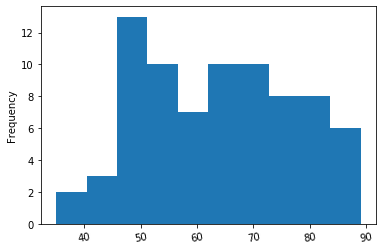

In [503]:
data['Audiencescore'].plot(kind='hist', rot=10, logx=False, logy=False)
plt.show()

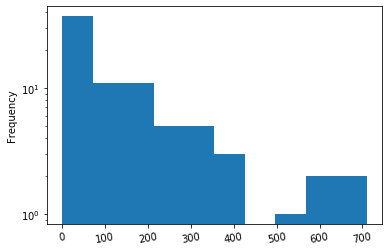

In [504]:
data['WorldwideGross'].plot(kind='hist', rot=10, logx=False, logy=True)
plt.show()


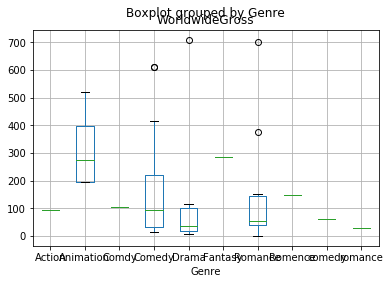

In [505]:
data.boxplot(column='WorldwideGross', by= 'Genre')
plt.show()

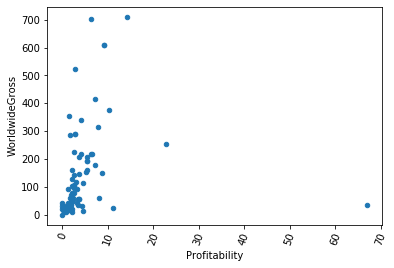

In [506]:
# Create and display the first scatter plot
data.plot(kind='scatter', x='Profitability', y='WorldwideGross', rot=70)
plt.show()

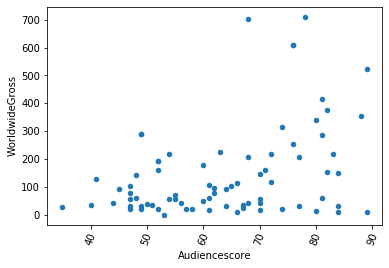

In [507]:
# Create and display the first scatter plot
data.plot(kind='scatter', x='Audiencescore', y='WorldwideGross', rot=70)
plt.show()

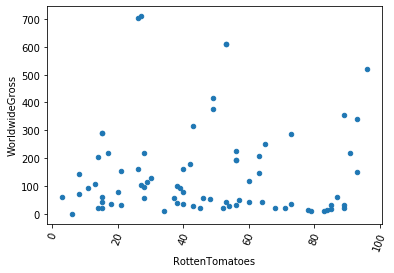

In [508]:
# Create and display the first scatter plot
data.plot(kind='scatter', x='RottenTomatoes', y='WorldwideGross', rot=70)
plt.show()

In [509]:
data.shape

(77, 8)

In [510]:
rows, col = data.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows, col))


There are 77 total entries of movies and 8 no.of columns in it.


In [511]:
data.drop_duplicates(keep ='first', inplace=True)
rows, col = data.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows, col))

There are now 75 total entries of movies and 8 no.of columns in it.


In [512]:
# creating a seperate list of revenue and budget column
temp_list=['WorldwideGross']

#this will replace all the value from '0' to NAN in the list
data[temp_list] = data[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
data.dropna(subset = temp_list, inplace = True)

rows, col = data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows))

So after removing such entries, we now have only 75 no.of movies.


In [513]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= data[column].idxmax()
    high_details=pd.DataFrame(data.loc[high])
    
    #for lowest earned profit
    low= data[column].idxmin()
    low_details=pd.DataFrame(data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('Profitability')

,68,3
Film,Fireproof,When in Rome
Genre,Drama,Comedy
LeadStudio,Independent,Disney
Audiencescore,51,44
Profitability,66.934,0
RottenTomatoes,40,15
WorldwideGross,33.47,43.04
Year,2008,2010


In [514]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= data[column].idxmax()
    high_details=pd.DataFrame(data.loc[high])
    
    #for lowest earned profit
    low= data[column].idxmin()
    low_details=pd.DataFrame(data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info
#calling the function
calculate('WorldwideGross')

,14,8
Film,The Twilight Saga: New Moon,Waiting For Forever
Genre,Drama,Romance
LeadStudio,Summit,Independent
Audiencescore,78,53
Profitability,14.1964,0.005
RottenTomatoes,27,6
WorldwideGross,709.82,0.03
Year,2009,2011


In [515]:
# defining a function to find average of a column
def avg_fun(column):
    return data[column].mean()

In [516]:

#calling above function
avg_fun('Audiencescore')

63.72

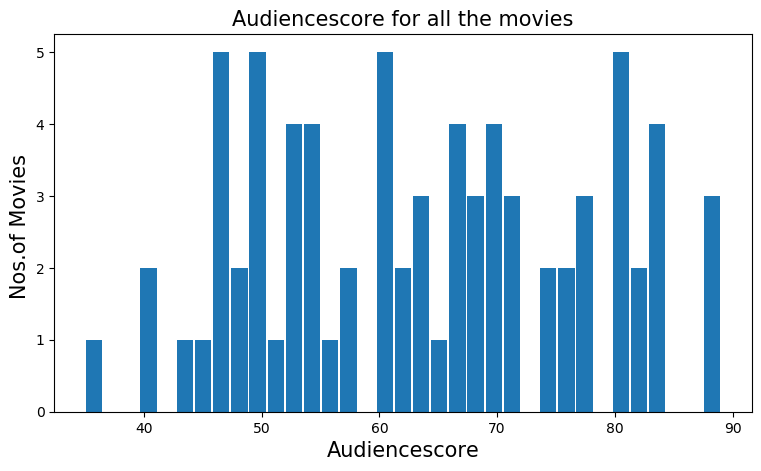

In [517]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Audiencescore', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies ', fontsize=15)
#Name of the graph
plt.title('Audiencescore for all the movies', fontsize=15)

#giving a histogram plot
plt.hist(data['Audiencescore'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

In [518]:
print(data.head())

                                 Film    Genre             LeadStudio  \
0          Zack and Miri Make a Porno  Romance  The Weinstein Company   
1                     Youth in Revolt   Comedy  The Weinstein Company   
2  You Will Meet a Tall Dark Stranger   Comedy            Independent   
3                        When in Rome   Comedy                 Disney   
4               What Happens in Vegas   Comedy                    Fox   

   Audiencescore  Profitability  RottenTomatoes  WorldwideGross  Year  
0             70       1.747542              64           41.94  2008  
1             52       1.090000              68           19.62  2010  
2             35       1.211818              43           26.66  2010  
3             44       0.000000              15           43.04  2010  
4             72       6.267647              28          219.37  2008  


In [519]:

from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

In [520]:
data['Genre'].str.lower()

0       romance
1        comedy
2        comedy
3        comedy
4        comedy
5         drama
6     animation
7       romance
8       romance
9        comedy
10      romance
11      romance
12      romance
13       comedy
14        drama
15        drama
16       comedy
17       comedy
18       comedy
19        drama
20      fantasy
21       comedy
22    animation
23      romance
24       comedy
25       comedy
26       comedy
27       comedy
28        drama
29        drama
        ...    
45       comedy
47        comdy
48        drama
49       comedy
50       comedy
51       comedy
52       comedy
53       comedy
54       comedy
55       action
56       comedy
57      romance
58       comedy
59       comedy
60       comedy
61       comedy
62       comedy
63       comedy
64    animation
66       comedy
67       comedy
68        drama
69       comedy
70        drama
71       comedy
72      romance
73        drama
74        drama
75       comedy
76       comedy
Name: Genre, Length: 75,

In [521]:
data['Genre']=data['Genre'].str.lower()

In [522]:
data.Genre = data.Genre.replace(to_replace ='comdy', value = 'comedy', regex = True)

In [523]:
data.Genre = data.Genre.replace(to_replace ='darama', value = 'drama', regex = True)

In [524]:
data.Genre = data.Genre.replace(to_replace ='romence', value = 'romance', regex = True)


In [525]:
data['Genre'].head(45)

0       romance
1        comedy
2        comedy
3        comedy
4        comedy
5         drama
6     animation
7       romance
8       romance
9        comedy
10      romance
11      romance
12      romance
13       comedy
14        drama
15        drama
16       comedy
17       comedy
18       comedy
19        drama
20      fantasy
21       comedy
22    animation
23      romance
24       comedy
25       comedy
26       comedy
27       comedy
28        drama
29        drama
30       comedy
31      romance
32       comedy
33       comedy
34      romance
35        drama
36       comedy
37       comedy
38      romance
39        drama
40      romance
41      romance
42       comedy
43      romance
44       comedy
Name: Genre, dtype: object

In [526]:
data['WorldwideGross'].groupby([data['Genre'],data['Film']]).sum()

Genre      Film                               
action     Killers                                 93.40
animation  Gnomeo and Juliet                      193.97
           Tangled                                355.01
           WALL-E                                 521.28
comedy     (500) Days of Summer                    60.72
           27 Dresses                             160.31
           Beginners                               14.31
           Enchanted                              340.49
           Four Christmases                       161.83
           Ghosts of Girlfriends Past             102.22
           Going the Distance                      42.05
           Good Luck Chuck                         59.19
           He's Just Not That Into You            178.84
           High School Musical 3: Senior Year     252.04
           I Love You Phillip Morris               20.10
           It's Complicated                       224.60
           Just Wright                   

In [527]:
data['WorldwideGross'].groupby([data['Year'],data['Film']]).max()

Year  Film                               
2007  Across the Universe                     29.37
      Enchanted                              340.49
      Good Luck Chuck                         59.19
      Knocked Up                             219.00
      License to Wed                          69.31
      Music and Lyrics                       145.90
      No Reservations                         92.60
      P.S. I Love You                        153.09
      The Heartbreak Kid                     127.77
      Tyler Perry's Why Did I get Married     55.86
      Waitress                                22.18
2008  27 Dresses                             160.31
      Fireproof                               33.47
      Four Christmases                       161.83
      High School Musical 3: Senior Year     252.04
      Made of Honor                          105.96
      Mamma Mia!                             609.47
      Marley and Me                          206.07
      Miss Pettigrew L

In [528]:
data['WorldwideGross']= data['WorldwideGross'].fillna(np.mean(data['WorldwideGross']))

In [529]:
data_2007= data[data.Year==2007]
data_2008= data[data.Year==2008]
data_2009= data[data.Year==2009]
data_2010= data[data.Year==2010]
data_2011= data[data.Year==2011]


In [530]:
data_2007.loc[data_2007['WorldwideGross']==max(data_2007['WorldwideGross'])]

,Film,Genre,LeadStudio,Audiencescore,Profitability,RottenTomatoes,WorldwideGross,Year
69,Enchanted,comedy,Disney,80,4.005737,93,340.49,2007


In [531]:
data_2008.loc[data_2008['WorldwideGross']==max(data_2008['WorldwideGross'])]

,Film,Genre,LeadStudio,Audiencescore,Profitability,RottenTomatoes,WorldwideGross,Year
45,Mamma Mia!,comedy,Universal,76,9.234454,53,609.47,2008


In [532]:
data_2009.loc[data_2009['WorldwideGross']==max(data_2009['WorldwideGross'])]

,Film,Genre,LeadStudio,Audiencescore,Profitability,RottenTomatoes,WorldwideGross,Year
14,The Twilight Saga: New Moon,drama,Summit,78,14.1964,27,709.82,2009


In [533]:
data_2010.loc[data_2010['WorldwideGross']==max(data_2010['WorldwideGross'])]

,Film,Genre,LeadStudio,Audiencescore,Profitability,RottenTomatoes,WorldwideGross,Year
22,Tangled,animation,Disney,88,1.365692,89,355.01,2010


In [534]:
data_2011.loc[data_2011['WorldwideGross']==max(data_2011['WorldwideGross'])]

,Film,Genre,LeadStudio,Audiencescore,Profitability,RottenTomatoes,WorldwideGross,Year
11,Twilight: Breaking Dawn,romance,Independent,68,6.383364,26,702.17,2011


In [535]:
data['RottenTomatoes']
pd.pivot_table(data, values='Film', index= ['Genre'], columns= None, aggfunc='count')

,Film
Genre,
action,1
animation,3
comedy,42
drama,13
fantasy,1
romance,15


In [536]:
pd.pivot_table(data, values= 'RottenTomatoes', index=['LeadStudio'], columns= None, aggfunc= np.mean)

,RottenTomatoes
LeadStudio,
20th Century Fox,49.000000
CBS,20.000000
Disney,65.285714
Fox,51.833333
Independent,45.473684
Lionsgate,7.000000
New Line,15.000000
Paramount,46.250000
Sony,52.000000


In [446]:
df =pd.get_dummies(data, columns=['Genre', 'LeadStudio'], drop_first=True)

In [537]:
df.head()

,Film,Audiencescore,Profitability,RottenTomatoes,WorldwideGross,Year,Genre_animation,Genre_comedy,Genre_drama,Genre_fantasy,...,LeadStudio_Fox,LeadStudio_Independent,LeadStudio_Lionsgate,LeadStudio_New Line,LeadStudio_Paramount,LeadStudio_Sony,LeadStudio_Summit,LeadStudio_The Weinstein Company,LeadStudio_Universal,LeadStudio_Warner Bros.
0,Zack and Miri Make a Porno,70,1.747542,64,41.94,2008,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Youth in Revolt,52,1.090000,68,19.62,2010,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,You Will Meet a Tall Dark Stranger,35,1.211818,43,26.66,2010,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,When in Rome,44,0.000000,15,43.04,2010,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,What Happens in Vegas,72,6.267647,28,219.37,2008,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [538]:
X = df.drop(['Film','WorldwideGross'], axis=1)

In [539]:
Y = df['WorldwideGross']

In [542]:
# Saving feature names for later use
feature_list = list(X.columns)

In [543]:
# Convert to numpy array
features = np.array(X)

In [547]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 76
Data columns (total 21 columns):
Audiencescore                       75 non-null int64
Profitability                       75 non-null float64
RottenTomatoes                      75 non-null int64
Year                                75 non-null int64
Genre_animation                     75 non-null uint8
Genre_comedy                        75 non-null uint8
Genre_drama                         75 non-null uint8
Genre_fantasy                       75 non-null uint8
Genre_romance                       75 non-null uint8
LeadStudio_CBS                      75 non-null uint8
LeadStudio_Disney                   75 non-null uint8
LeadStudio_Fox                      75 non-null uint8
LeadStudio_Independent              75 non-null uint8
LeadStudio_Lionsgate                75 non-null uint8
LeadStudio_New Line                 75 non-null uint8
LeadStudio_Paramount                75 non-null uint8
LeadStudio_Sony                

In [564]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
 # Splitting the dataset into train and test 
#X_train, X_test, y_train, y_test = train_test_split(  
    #X, Y, test_size = 0.3, random_state = 100) 

In [557]:
# Import the model we are using
#from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 1000, random_state = 44)
# Train the model on training data
#rf.fit(X_train, y_train);

In [558]:
# Use the forest's predict method on the test data
#predictions = rf.predict(X_test)

In [559]:
# Calculate the absolute errors
#errors = abs(predictions - y_test)

In [560]:
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 106.12 degrees.


In [565]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([-0.83937772,  0.0416279 , -3.9671089 ,  0.70751417, -1.08524065,
        0.0760432 , -6.59556442,  0.40205483, -3.81356157, -7.74520569])